In [182]:
from random import randrange
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd

##### Custom-Timer 

In [179]:
from time import perf_counter

class TimerError(Exception):
    """A Custom Error"""

class Timer:
    """Create a new Timer() object"""
    def __init__(self):
        self._start = None
        self._elapsed = None
    def start(self):
        """Start a new Timer"""
        if self._start != None:
            raise TimerError("Timer is running. Use .stop() to reset the timer")
        self._start = perf_counter()
    def stop(self):
        """Save the elapsed time and reset the timer"""
        if self._start == None:
            raise TimerError("Timer is not running. Use .start() to start a new Timer")
        self._elapsed = perf_counter() - self._start
        self._start = None
    def elapsed(self):
        """Report elapsed time"""
        if self._elapsed == None:
            raise TimerError("Timer has not started yet. Use .start() to start a new Timer")
        return self._elapsed
    def __str__(self):
        return str(self.elapsed())

### 1. Graph 
Web graphs

In [180]:
with open('./Data_Set_Web_Graphs.txt', 'r') as f:
    edge_list = list(map(lambda x: tuple(map(int, x.split())), f.readlines()))
    adj_list = defaultdict(list)
    for edge in edge_list:
        adj_list[edge[0]].append(edge[1])

- #### Reachability
Find out how many clicks your favorite webpage is from the given home page.

In [181]:
def Clicks(adj_list: dict) -> None:
    visited = {i: False for i in range(6301)}

    with open('./reachability.csv', 'w') as f:
        f.write(f'Home Page,Webpage,Clicks\n')

    for node in adj_list:
        if not visited[node]:
            path = {i: 0 for i in range(6301)}
            queue = []
            queue.append(node)
            visited[node] = True
            
            with open('./reachability.csv', 'a') as f:
                f.write(f'{node},{node},{0}\n')
                while queue:
                    head = queue.pop(0)
                    if head in adj_list:
                        for neighbour in adj_list[head]:
                            if not visited[neighbour]:
                                visited[neighbour] = True
                                path[neighbour] = path[head] + 1
                                queue.append(neighbour)
            
                for i in path:
                    if path[i] != 0:
                        f.write(f'{node},{i},{path[i]}\n')

Clicks(adj_list)
df = pd.read_csv('./reachability.csv')
df.sample(10)

,Home Page,Webpage,Clicks
3411,0,3663,6
3651,0,3903,5
866,0,930,5
5834,0,6104,8
3828,0,4080,5
3106,0,3347,6
3563,0,3815,6
37,0,40,9
1339,0,1498,11
246,0,265,3


- #### Topological Ordering
Is it possible to linearly order a huge network of webpages?

In [49]:
def topological(adj_list):
    indegree = {i:0 for i in range(6301)}
    for i in adj_list:
        for j in adj_list[i]:
            indegree[j] += 1
    
    while indegree:
        l = [i for i in indegree if not indegree[i]]
        if l == []:
            break
        l = l[0]
        print(l, '', end='', sep='->')
        if l in adj_list:
            for i in adj_list[l]:
                indegree[i] -= 1
        indegree.pop(l)

topological(adj_list)

0->1->6->22->26->44->46->52->66->70->72->74->98->109->192->194->236->24->237->239->242->245->310->316->317->319->320->366->399->403->408->410->417->421->428->431->439->441->444->445->447->516->517->519->525->537->539->543->545->546->636->639->641->644->647->653->719->723->752->775->797->896->899->903->905->929->934->936->948->949->950->961->964->966->992->994->999->1008->1075->1080->1083->1098->1099->1101->1108->1110->1111->1112->1113->1117->1119->1121->1161->1181->1182->1183->1185->1186->1187->1188->1189->1190->1200->1201->1204->1205->1206->1207->1218->1000->1222->1225->1226->1237->1238->1241->1242->1244->1247->1260->1263->1286->1293->1294->1296->1298->1307->1308->1312->1314->1315->1398->1399->1403->1406->1410->1445->1446->1448->1449->1450->1452->1453->1295->1455->1462->1463->1464->1465->1467->1468->1469->1470->1472->1474->1478->1479->1483->1494->1497->1499->1502->1520->1521->1523->1525->1527->1562->405->1105->1566->1567->1579->1580->1582->1596->1603->1625->1648->1649->1657->1660->166

Topological sort is only applicable on Directed Acyclic Graph (DAG). Since, this dataset contains cycles, the algorithm stops midway. 

- #### Webpage Navigation
Find the strongly connected components in the graph.

In [177]:
def find_stronglly_connected(adj_list: dict) -> None:
    visited = {i: False for i in range(6301)}
    nodes = list(adj_list.keys())
    stack = []
    for node in nodes:
        if not visited[node]:
            DFS(adj_list, visited, node, stack)

    with open('./strongly_connected.csv', 'w') as f:
        f.write('Components,Nodes\n')
        
    rev_graph = reverse_graph(edge_list)
    visited = {i: False for i in range(6301)}
    
    with open('./strongly_connected.csv', 'a') as f:
        while stack:
            i = stack.pop()
            grp = []
            if not visited[i]:
                DFS(rev_graph, visited, i, grp)
                component = str(list(reversed(grp))).replace(', ', '-')
                n = len(component.split('-'))
                f.write(f'{component},{n}\n')
                

def DFS(adj_list: dict, visited: dict, v: int, stack: list) -> None:
    visited[v] = True

    if v in adj_list:
        for neighbour in adj_list[v]:
            if not visited[neighbour]:
                DFS(adj_list, visited, neighbour, stack)
    stack.append(v)

def reverse_graph(edge_list: list) -> dict:
    rev_graph = defaultdict(list)
    for edge in edge_list:
        rev_graph[edge[1]].append(edge[0])
    return rev_graph

find_stronglly_connected(adj_list)
df = pd.read_csv('./strongly_connected.csv')
df.sample(10)


,Components,Nodes
3151,[3695],1
1166,[5743],1
2375,[3162],1
4226,[578],1
66,[1582],1
460,[6142],1
2742,[3105],1
4123,[69],1
1774,[6122],1
4127,[1051],1


### 2. Sorting 
Implement bubble sort algorithm

In [84]:
def bubble_sort(arr: list) -> None:
    n = len(arr)
    for i in range(n):
        for j in range(n - 1 - i):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    
arr = [randrange(1000) for _ in range(10)]

print("Array before sorting:", *arr)
bubble_sort(arr)
print("Array after sorting:", *arr)

Array before sorting: 422 608 816 570 834 30 487 986 164 487
Array after sorting: 30 164 422 487 487 570 608 816 834 986


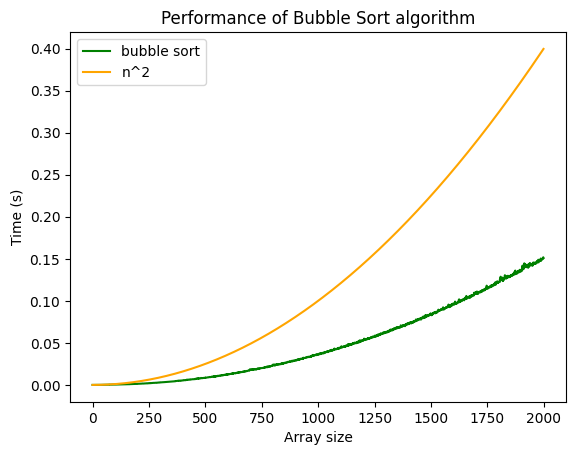

In [83]:
n = 2000
x = [i for i in range(n)]
y1 = [(i**2) * 1e-7 for i in range(n)]
y2 = []

for i in range(n):
    arr = [randrange(n) for j in range(i)]
    t = Timer()
    t.start()
    bubble_sort(arr)
    t.stop()
    y2.append(t.elapsed())

plt.plot(x, y2, color = 'green', label = 'bubble sort')
plt.plot(x, y1, color = 'orange', label = 'n^2')

plt.xlabel('Array size')
plt.ylabel('Time (s)')
plt.title('Performance of Bubble Sort algorithm')

plt.legend()
plt.show()